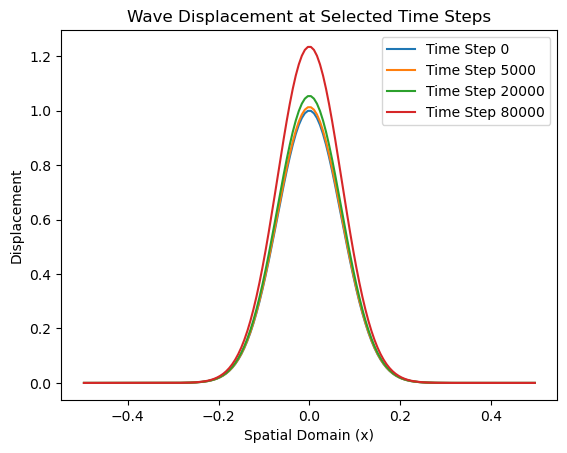

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dst, idst
from numpy.linalg import solve
from numpy import matmul

# Parameters
N = 150  ### for smoothness baby
L = 1.0
h = L / N
x = -L / 2 + h * np.arange(0, N) + h / 2  # Ths is going to track displacement
k = np.arange(1, N + 1) * np.pi / L

# More paramters
f1 = 256 #f1 = sqrt(T/M) *1/2L 
lambda_ = 2*np.pi*k*f1

dt = 2/np.max(lambda_)
N_ts = int(1/dt)

# Initial condition functions
def H0(x):
    return np.exp(-100*(x**2))

def Ht0(x):
    return np.zeros_like(x)

# Initial conditions in spatial domain
A0 = H0(x)
V0 = Ht0(x)

# Compute DST of the initial conditions
An = dst(A0, type=1)
Vn = dst(V0, type=1)

#plt.plot(x, iAn) #plotting initial condition to check gaussian

### SOLVING FORWARD EULER BABY

# # First initialize Identity matrix and coefficient vectors and Matrix M
I = np.eye(2)
solutions = []
# Time evolution
for n in range(N_ts):
    An_new = np.zeros_like(An)
    Vn_new = np.zeros_like(Vn)
    
    for k in range(1, N + 1):
        W_n = np.array([[An[k-1]], [Vn[k-1]]])
        lambda_k = 2 * np.pi * k * f1
        M_k = np.array([[1, 0], [-lambda_k**2, 0]])
        
        W_new = np.matmul((I + dt * M_k), W_n)
        
        An_new[k-1], Vn_new[k-1] = W_new[0, 0], W_new[1, 0]
    
    An, Vn = An_new, Vn_new
    
    # Convert updated coefficients to spatial domain and store
    A_spatial = idst(An, type=1)
    solutions.append(A_spatial)

# # Visualization (plotting every 10th time step as an example)
# for i, A in enumerate(solutions[::10]):
#     plt.plot(x, A, label=f'Time Step {i*10}')
    
selected_steps = [0, 5000, 20000, 80000]

for step in selected_steps:
    plt.plot(x, solutions[step], label=f'Time Step {step}')
    
plt.legend()
plt.title('Wave Displacement at Selected Time Steps')
plt.xlabel('Spatial Domain (x)')
plt.ylabel('Displacement')
plt.show()


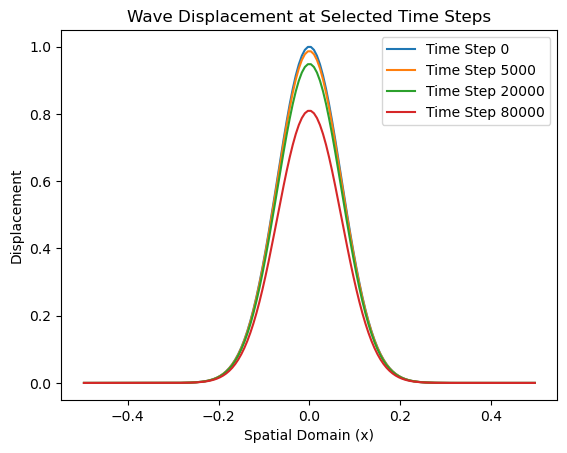

In [89]:
# First initialize Identity matrix and coefficient vectors and Matrix M
I = np.eye(2)
solutions = []

# Initial conditions in spectral domain (assuming you have defined them somewhere)
An = dst(A0, type=1)
Vn = dst(V0, type=1)

# Time evolution
for n in range(N_ts):
    An_new = np.zeros_like(An)
    Vn_new = np.zeros_like(Vn)
    
    for k in range(1, N + 1):
        W_n = np.array([[An[k-1]], [Vn[k-1]]])
        lambda_k = 2 * np.pi * k * f1
        M_k = np.array([[1, 0], [-lambda_k**2, 0]])
        
        # Solving for W_new
        W_new = np.linalg.solve((I + dt * M_k), W_n)
        
        An_new[k-1], Vn_new[k-1] = W_new[0, 0], W_new[1, 0]
    
    An, Vn = An_new, Vn_new
    
    # Convert updated coefficients to spatial domain and store
    A_spatial = idst(An, type=1)
    solutions.append(A_spatial)

    
selected_steps = [0, 5000, 20000, 80000]

for step in selected_steps:
    plt.plot(x, solutions[step], label=f'Time Step {step}')
    
plt.legend()
plt.title('Wave Displacement at Selected Time Steps')
plt.xlabel('Spatial Domain (x)')
plt.ylabel('Displacement')
plt.show()


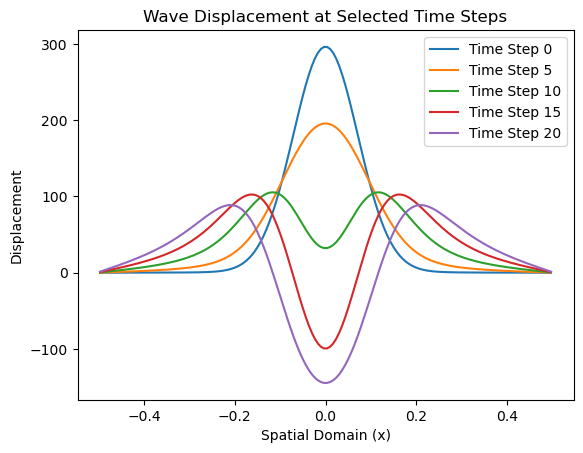

In [141]:
N = 150
x = -L / 2 + h * np.arange(0, N) + h / 2

An = dst(A0, type=1)
Vn = dst(V0, type=1)

solutions = []

for i in range(25):
    An_new = np.zeros_like(An)
    Vn_new = np.zeros_like(Vn)
    
    for k in range(1, N+1):
        lambda_k = 2 * np.pi**2 * k * f1

        V_n1 = -lambda_k*dt*An[k-1] + Vn[k-1]
        # Calculate A_n1 using A_n and V_n
        A_n1 = An[k-1] + dt * V_n1
        An_new[k-1] = A_n1
        Vn_new[k-1] = V_n1
        
    An, Vn = An_new, Vn_new
    
    # Convert updated coefficients to spatial domain and store
    A_spatial = idst(An, type=1)
    solutions.append(A_spatial)

selected_steps = [0,5,10,15,20]

for step in selected_steps:
    plt.plot(x, solutions[step], label=f'Time Step {step}')    
plt.legend()
plt.title('Wave Displacement at Selected Time Steps')
plt.xlabel('Spatial Domain (x)')
plt.ylabel('Displacement')
plt.show()


150